In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shanks01","key":"a9ee205e45a686d3db591afae2b2d4c0"}'}

In [ ]:
!ls -lha kaggle.json

!pip install -q Kaggle

!mkdir -p ~/.kaggle 
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets list -s image 

-rw-r--r-- 1 root root 64 Feb 10 16:07 kaggle.json
ref                                               title                                      size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------  ----------------------------------------  -----  -------------------  -------------  ---------  ---------------  
muratkokludataset/pistachio-image-dataset         Pistachio Image Dataset                    27MB  2022-03-28 18:01:27           2322       1545  0.9375           
muratkokludataset/rice-image-dataset              Rice Image Dataset                        219MB  2022-04-03 02:12:00           7001       1648  0.875            
puneet6060/intel-image-classification             Intel Image Classification                346MB  2019-01-30 09:22:58          72216       1273  0.75             
vishalsubbiah/pokemon-images-and-types            Pokemon Image Dataset                       2MB  2018-12-17 01:01:39          2

In [ ]:
!kaggle datasets download -d puneet6060/intel-image-classification
!unzip intel-image-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: seg_train/seg_train/mountain/7506.jpg  
  inflating: seg_train/seg_train/mountain/7537.jpg  
  inflating: seg_train/seg_train/mountain/7539.jpg  
  inflating: seg_train/seg_train/mountain/7551.jpg  
  inflating: seg_train/seg_train/mountain/7560.jpg  
  inflating: seg_train/seg_train/mountain/7565.jpg  
  inflating: seg_train/seg_train/mountain/7578.jpg  
  inflating: seg_train/seg_train/mountain/7581.jpg  
  inflating: seg_train/seg_train/mountain/7586.jpg  
  inflating: seg_train/seg_train/mountain/7647.jpg  
  inflating: seg_train/seg_train/mountain/7652.jpg  
  inflating: seg_train/seg_train/mountain/7654.jpg  
  inflating: seg_train/seg_train/mountain/7662.jpg  
  inflating: seg_train/seg_train/mountain/767.jpg  
  inflating: seg_train/seg_train/mountain/7672.jpg  
  inflating: seg_train/seg_train/mountain/7679.jpg  
  inflating: seg_train/seg_train/mountain/7681.jpg  
  inflating: seg_train/seg_train/mountain/7693.jp

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
train = 'seg_train/seg_train'
test = 'seg_test/seg_test'

In [ ]:
os.listdir(train)

['glacier', 'buildings', 'street', 'mountain', 'forest', 'sea']

In [ ]:
total_training=0
for i in os.listdir(train):
  total_training += len(os.listdir(f'{train}/{i}'))

print(total_training)

14034


In [ ]:
total_testing=0
for i in os.listdir(test):
  total_testing += len(os.listdir(f'{test}/{i}'))

print(total_testing)

3000


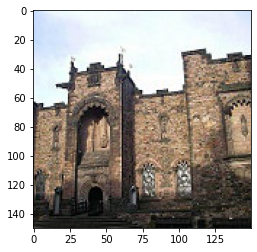

In [ ]:
choice= "buildings"
path= os.listdir(f"{train}/{choice}")[0]
img= plt.imread(f"{train}/{choice}/{path}")
plt.imshow(img)  

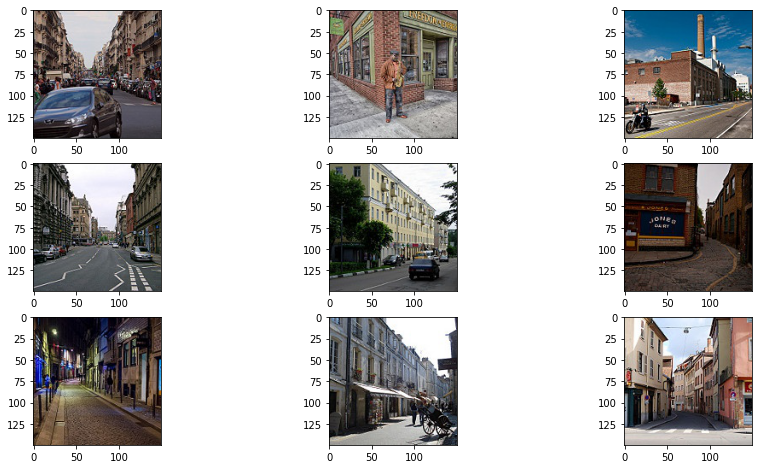

In [ ]:
plt.figure(figsize=(15,8))

for i in range(9):
  plt.subplot(3,3,i+1)
  choice= "street"
  path= os.listdir(f"{train}/{choice}")[i+1]
  img= plt.imread(f"{train}/{choice}/{path}")
  plt.imshow(img)  





In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_image_generate = ImageDataGenerator(
    rescale= 1/255.0,
    rotation_range= 45,
    zoom_range = 0.2  
  
)

In [ ]:
test_image_generate = ImageDataGenerator(
    rescale = 1/255.0
)

In [ ]:
training_data = train_image_generate.flow_from_directory( train, 
                                                        target_size=(224,224),
                                                        class_mode ="categorical",
                                                        batch_size = 32
)

Found 14034 images belonging to 6 classes.


In [ ]:
testing_data = test_image_generate.flow_from_directory( test, 
                                                        target_size=(224,224),
                                                        class_mode ="categorical",
                                                        batch_size = 32
)

Found 3000 images belonging to 6 classes.


In [ ]:
for image,label in training_data:
  print(image.shape)
  print(label.shape)
  break

(32, 224, 224, 3)
(32, 6)


In [ ]:
model = keras.models.Sequential()
# scan image
model.add(keras.layers.Conv2D(32,3,input_shape=(224,224,3)))
# downsize image
model.add(keras.layers.MaxPooling2D())

model.add(keras.layers.Conv2D(64,3,activation="relu"))
model.add(keras.layers.MaxPooling2D())

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation="relu"))
model.add(keras.layers.Dense(6,activation="softmax"))

for optimiser u can use either "adam" or "rmsprop"

In [ ]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])

In [ ]:
history = model.fit(training_data,validation_data=testing_data,epochs=5,steps_per_epoch=150)

Epoch 1/5
150/150 [==============================] - 521s 3s/step - loss: 1.7938 - accuracy: 0.5142 - val_loss: 1.1292 - val_accuracy: 0.5633
Epoch 2/5
150/150 [==============================] - 513s 3s/step - loss: 1.0759 - accuracy: 0.5804 - val_loss: 1.1255 - val_accuracy: 0.5913
Epoch 3/5
150/150 [==============================] - 500s 3s/step - loss: 1.0029 - accuracy: 0.6242 - val_loss: 0.9836 - val_accuracy: 0.6487
Epoch 4/5
150/150 [==============================] - 490s 3s/step - loss: 0.9687 - accuracy: 0.6340 - val_loss: 0.9661 - val_accuracy: 0.6307
Epoch 5/5
150/150 [==============================] - 496s 3s/step - loss: 0.9190 - accuracy: 0.6521 - val_loss: 0.9375 - val_accuracy: 0.6647


In [ ]:
model.save("intel_model.h5")

In [ ]:
from keras.models import load_model

In [ ]:
saved_model =load_model("intel_model.h5")

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 128)               2

# prediction on real time

(-0.5, 149.5, 149.5, -0.5)

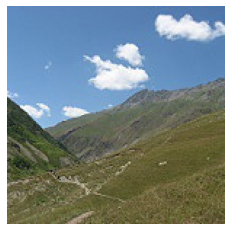

In [ ]:
path = f"{test}/mountain"
random_image = os.listdir(path)[0]
img = plt.imread(f"{path}/{random_image}")

plt.imshow(img)
plt.axis("off")

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

In [ ]:
img= load_img(f"{path}/{random_image}",target_size=(224,224,3))

In [ ]:
x= img_to_array(img)
x.shape

(224, 224, 3)

In [ ]:
x= np.expand_dims(x,axis=0)
x.shape

(1, 224, 224, 3)

In [ ]:
target= model.predict(x)
target=np.argmax(target)

1/1 [==============================] - 0s 141ms/step


In [ ]:
target

3

In [ ]:
class_names = ['buildings','forest','glacier','sea','street','mountain']
class_names.sort()

In [ ]:
class_names[target]

'mountain'